In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import csv

## Plot Joints (Figure 3C)

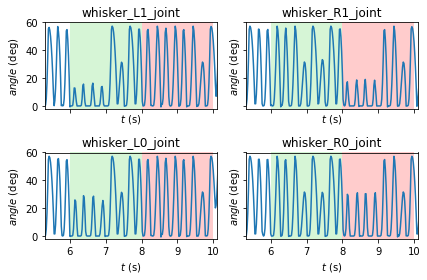

In [2]:
folder = "./"
file_name = folder + "joints_positions.csv"

with open(file_name) as f:
    reader = csv.reader(f)
    rows = [r for r in reader][1:]

joints = {}

for r in rows:
    name = r[0]
    t = float(r[1])
    pos = float(r[2])

    if name not in joints.keys():
        joints[name] = [], []

    if pos != 0.0:
        joints[name][0].append(t)
        joints[name][1].append(pos)


# L0 R0 L1 R1
joint_names = ['whisker_' + side + str(i) + '_joint'
               for i in [1, 0] for side in 'LR']

fig, ax = plt.subplots(2, 2, figsize=(6, 4), sharex=True, sharey=True)
ax = ax.ravel()
for i, joint_name in enumerate(joint_names):
    joint = joints[joint_name]
    plt.tight_layout()

    ax[i].set_title(joint_name)
    ax[i].set_xlabel('$t$ (s)')
    ax[i].set_ylabel('$angle$ (deg)')

    ax[i].plot(joint[0], np.rad2deg(joint[1]))
    rect_go = patches.Rectangle((6, -2), 2, 65, edgecolor='none', facecolor='limegreen', alpha=0.2)
    rect_nogo = patches.Rectangle((8, -2), 2, 65, edgecolor='none', facecolor='red', alpha=0.2)
    ax[i].add_patch(rect_go)
    ax[i].add_patch(rect_nogo)


plt.xlim([5.3, 10.1])
plt.ylim([-2, 60])
plt.show()

## Plot Facial Nuclei with Joints (Figure 3B)

In [3]:
with open(folder + "spikes.csv") as f:
    reader = csv.reader(f)
    rows = [r for r in reader][1:]

events = {}  # {id: spike times}

for row in rows:
    n_id, t = row
    n_id = int(float(n_id))
    t = float(t)
    
    try:
        events[n_id].append(t)
    except:
        events[n_id] = []


n_ids = np.array(list(events.keys()), dtype=int)
n_ids.sort()

In [4]:
def plot_spikes(color, msize, pop_range, label, ax):
    global n_ids
    label_done = False
    for i in n_ids:
        if i in pop_range:
            spikes = events[i]
            if not label_done:
                ax.plot(spikes, np.full_like(spikes, i), marker=".", markersize=msize, label=label, color=color, linestyle="None")
                label_done = True
            else:
                ax.plot(spikes, np.full_like(spikes, i), marker=".", markersize=msize, color=color, linestyle="None")

In [5]:
def plot_firingrate(color, pop_range, label, binw, ax):
    global n_ids
    spikes = []
    for i in n_ids:
        if i in pop_range:
            spikes.append(events[i])
    if len(spikes) == 0:
        return
    spikes = np.concatenate(spikes)
    
    frequency = []
    for t in range(0, tmax, binw):
        frequency.append(len(np.where(np.logical_and(spikes > t, spikes <= t + binw))[0]))
    
    frequency = np.array(frequency, dtype=float) * (1000.0 / binw) / len(pop_range)
    ax.bar(range(0, tmax, binw), frequency, width=binw, color=color, edgecolor="k")

In [6]:
def compute_firingrate(pop_range, start, stop, binw):
    global n_ids
    spikes = []
    for i in n_ids:
        if i in pop_range:
            spikes.append(events[i])
    if len(spikes) == 0:
        print("No spikes, firing rate = 0")
        return
    spikes = np.concatenate(spikes)
    
    frequency = []
    for t in range(start, stop, binw):
        frequency.append(len(np.where(np.logical_and(spikes > t, spikes <= t + binw))[0]))
    
    frequency = np.array(frequency, dtype=float) * (1000.0 / binw) / len(pop_range)
    print(f"Frequency mean = {np.mean(frequency):.2f} Hz, sd = {np.std(frequency):.2f} Hz, min = {np.min(frequency):.2f} Hz, max = {np.max(frequency):.2f} Hz")

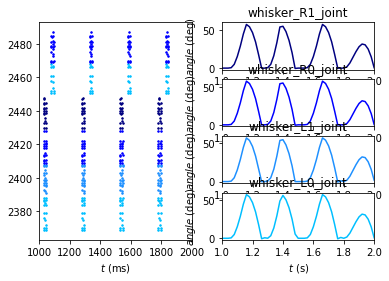

In [7]:
L0_pro = range(2369, 2389)
L1_pro = range(2389, 2409)
R0_pro = range(2409, 2429)
R1_pro = range(2429, 2449)
L_retr = range(2449, 2469)
R_retr = range(2469, 2489)
protractors = range(2369, 2449)
retractors =  range(2469, 2489)

fig = plt.figure()

gs = fig.add_gridspec(4,2)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3, 1])

ax1.set_xlabel('$t$ (ms)')
plot_spikes('deepskyblue', 3, L0_pro, None, ax1)
plot_spikes('dodgerblue', 3, L1_pro, None, ax1)
plot_spikes('blue', 3, R0_pro, None, ax1)
plot_spikes('navy', 3, R1_pro, None, ax1)
plot_spikes('deepskyblue', 3, L_retr, None, ax1)
plot_spikes('blue', 3, R_retr, None, ax1)
ax1.set_xlim([1000.0, 2000.0])


# Plot them in this order (from the bottom) L0 L1 R0 R1
ax = [ax4, ax2, ax5, ax3]
colors = [ "dodgerblue", "navy", "deepskyblue", "blue"]

for i, joint_name in enumerate(joint_names):
    joint = joints[joint_name]

    ax[i].set_title(joint_name)
    ax[i].set_xlabel('$t$ (s)')
    ax[i].set_ylabel('$angle$ (deg)')

    ax[i].plot(joint[0], np.rad2deg(joint[1]), color=colors[i])
    
    ax[i].set_xlim([1.0, 2.0])
    ax[i].set_ylim([-2, 60])
    
plt.show()

In [8]:
for name, population in zip(["L0_pro", "L1_pro", "R0_pro", "R1_pro", "L_retr", "R_retr", "protractors", "retractors"],
                            [L0_pro, L1_pro, R0_pro, R1_pro, L_retr, R_retr, protractors, retractors]):
    print(name)
    compute_firingrate(population, 1000, 2000, 10)

L0_pro
Frequency mean = 3.40 Hz, sd = 10.74 Hz, min = 0.00 Hz, max = 45.00 Hz
L1_pro
Frequency mean = 4.00 Hz, sd = 12.43 Hz, min = 0.00 Hz, max = 60.00 Hz
R0_pro
Frequency mean = 4.00 Hz, sd = 12.83 Hz, min = 0.00 Hz, max = 50.00 Hz
R1_pro
Frequency mean = 3.80 Hz, sd = 11.77 Hz, min = 0.00 Hz, max = 55.00 Hz
L_retr
Frequency mean = 2.60 Hz, sd = 7.76 Hz, min = 0.00 Hz, max = 35.00 Hz
R_retr
Frequency mean = 4.00 Hz, sd = 11.66 Hz, min = 0.00 Hz, max = 55.00 Hz
protractors
Frequency mean = 3.80 Hz, sd = 11.80 Hz, min = 0.00 Hz, max = 48.75 Hz
retractors
Frequency mean = 4.00 Hz, sd = 11.66 Hz, min = 0.00 Hz, max = 55.00 Hz


## TG Spikes Rasterplots and firing rates (Figures 4B and 4C)

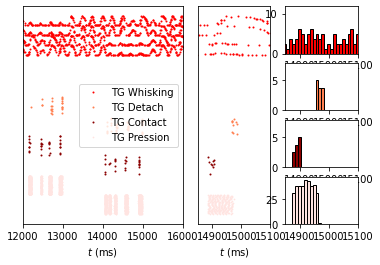

In [9]:
tgpr_range = range(2493, 2573)
tgct_range = range(2575, 2655)
tgdt_range = range(2657, 2737)
tgws_range = range(2821, 2901)

fig = plt.figure()

gs = fig.add_gridspec(4,4)
ax1 = fig.add_subplot(gs[:, 0:2])
ax2 = fig.add_subplot(gs[:, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[1, 3])
ax5 = fig.add_subplot(gs[2, 3])
ax6 = fig.add_subplot(gs[3, 3])

ax1.set_xlabel('$t$ (ms)')
plot_spikes('mistyrose', 1.5, tgpr_range, 'TG Pression', ax1)
plot_spikes('darkred', 2, tgct_range, 'TG Contact', ax1)
plot_spikes('coral', 2, tgdt_range, 'TG Detach', ax1)
plot_spikes('red', 2, tgws_range, 'TG Whisking', ax1)
ax1.set_xlim([12000, 16000])
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1])
ax1.set_yticks([])

ax2.set_xlabel('$t$ (ms)')
plot_spikes('mistyrose', 1.5, tgpr_range, 'TG Pression', ax2)
plot_spikes('darkred', 2, tgct_range, 'TG Contact', ax2)
plot_spikes('coral', 2, tgdt_range, 'TG Detach', ax2)
plot_spikes('red', 2, tgws_range, 'TG Whisking', ax2)
ax2.set_xlim([14850, 15100])
ax2.set_yticks([])

binw = 10  # [ms]
tmax = int(max(events.values())[0])
ax3.set_xlabel('$t$ (ms)')
plot_firingrate('mistyrose', tgpr_range, 'TG Pression', binw, ax6)
plot_firingrate('darkred', tgct_range, 'TG Contact', binw, ax5)
plot_firingrate('coral', tgdt_range, 'TG Detach', binw, ax4)
plot_firingrate('red', tgws_range, 'TG Whisking', binw, ax3)
ax3.set_xlim([14850, 15100])
ax4.set_xlim([14850, 15100])
ax5.set_xlim([14850, 15100])
ax6.set_xlim([14850, 15100])
plt.savefig("firing.pdf")
plt.show()

In [10]:
print("TG Whisking firing rate")
compute_firingrate(tgws_range, 14000, 15000, 10)

print("TG Pressure firing rate")
compute_firingrate(tgpr_range, 14900, 15000, 10)

TG Whisking firing rate
Frequency mean = 3.65 Hz, sd = 1.93 Hz, min = 0.00 Hz, max = 8.75 Hz
TG Pressure firing rate
Frequency mean = 27.00 Hz, sd = 17.69 Hz, min = 0.00 Hz, max = 43.75 Hz


## Learning curves (Figure 5)

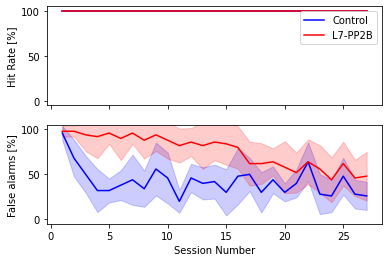

In [11]:
true_rate_all = {}
false_rate_all = {}
mean_true_rate = {}
mean_false_rate = {}
sd_true_rate = {}
sd_false_rate = {}

fig, ax = plt.subplots(2, 1, figsize=(6, 4), sharex=True, sharey=True)

color_cond = {"Control" : "b", "L7-PP2B": "r"}
n_cond = {"Control" : 10, "L7-PP2B": 10}
for condition in ["Control", "L7-PP2B"]:    
    true_rate_all[condition] = []
    false_rate_all[condition] = []
    
    for test in range(n_cond[condition]):
        folder = f"./{condition}/{test}/"
        file_name = folder + "events.csv"

        with open(file_name) as f:
            reader = csv.reader(f)
            events = [r for r in reader][1:]

        file_name = folder + "gonogo_events.csv"

        with open(file_name) as f:
            reader = csv.reader(f)
            gonogo = [r for r in reader][1:]

        N_trial = 270

        go_matrix = np.zeros(N_trial, dtype=int)
        counter = 0
        go_matrix[counter] = (gonogo[counter][0] == "GO")
        counter += 1
        next_change = int(float(gonogo[counter][1])) // 2
        for n in range(1, N_trial):
            if n < next_change:
                go_matrix[n] = go_matrix[n - 1]
            elif n == next_change:
                go_matrix[n] = not(go_matrix[n - 1])
                counter += 1
                next_change = int(float(gonogo[counter][1])) // 2

        hits = np.zeros(N_trial, dtype=int)
        good_response = np.zeros(N_trial, dtype=int)
        false_alarm = np.zeros(N_trial, dtype=int)

        for e in events:
            if e[0] == "contact":
                trial_of_event = int(float(e[1])) // 2
                if trial_of_event >= N_trial:
                    break
                hits[trial_of_event] = 1

                if e[2] == "no_reward":
                    false_alarm[trial_of_event] = 1
                else:
                    good_response[trial_of_event] = 1

        N_sess = N_trial // 10

        true_rate =  np.zeros(N_sess, dtype=float)
        false_rate =  np.zeros(N_sess, dtype=float)
        for s in range(N_sess):
            true_rate[s] = np.sum(good_response[s * 10: (s + 1) * 10]) * 20
            false_rate[s] = np.sum(false_alarm[s * 10: (s + 1) * 10]) * 20
            
        true_rate_all[condition].append(true_rate)
        false_rate_all[condition].append(false_rate)

    mean_true_rate[condition] = np.mean(np.column_stack(true_rate_all[condition]), axis=1)
    mean_false_rate[condition] = np.mean(np.column_stack(false_rate_all[condition]), axis=1)
    sd_true_rate[condition] = np.std(np.column_stack(true_rate_all[condition]), axis=1)
    sd_false_rate[condition] = np.std(np.column_stack(false_rate_all[condition]), axis=1)
        

    ax[0].fill_between(range(1, N_sess + 1), mean_true_rate[condition] - sd_true_rate[condition], mean_true_rate[condition] + sd_true_rate[condition], where=None, color=color_cond[condition], alpha=0.2)
    ax[0].plot(range(1, N_sess + 1), mean_true_rate[condition], color_cond[condition], label=condition)
    ax[0].set_ylabel("Hit Rate [%]")

    ax[1].fill_between(range(1, N_sess + 1), mean_false_rate[condition] - sd_false_rate[condition], mean_false_rate[condition] + sd_false_rate[condition], where=None, color=color_cond[condition], alpha=0.2)
    ax[1].plot(range(1, N_sess + 1), mean_false_rate[condition], color_cond[condition], label=condition)
    ax[1].set_ylabel("False alarms [%]")
    ax[1].set_xlabel("Session Number")
    plt.ylim([-5, 105])
    ax[0].legend()

plt.savefig("curves.pdf")
plt.show()